# Marvin Workshop (Shanghai 2016)

This Jupyter notebook will guide you through the installation of Marvin and will give you a hint of its capabilities. But enough talk, let's begin by installing Marvin. For that, run

`pip install sdss-marvin`

Now that you have installed Marvin, it's time to take your first steps.  If you want to learn more about how Marvin works, then go see [General Info](https://api.sdss.org/doc/manga/marvin/general.html) to learn about Marvin Modes, Versions, or Downloading.  If you just want to play, then read on.

First let's run some boilerplate code for Python 2/3 compatibility and plotting in the notebook:

In [1]:
from __future__ import print_function, division, absolute_import
import matplotlib.pyplot as plt
%matplotlib inline

Now, let’s import Marvin:

In [2]:
import marvin

INFO: No release version set. Setting default to MPL-5


Let's see what release we're using.  Releases can be either MPLs (e.g. MPL-5) or DRs (e.g. DR13), however DRs are currently disabled in Marvin.

In [3]:
marvin.config.release

'MPL-5'

On intial import, Marvin will set the default data release to use the latest MPL available, currently MPL-5. You can change the version of MaNGA data using the Marvin [Config](https://api.sdss.org/doc/manga/marvin/api/general.html#marvin-config-class).



In [4]:
from marvin import config
config.setRelease('MPL-4')

print('MPL:', config.release)

MPL: MPL-4


In general, we recommend using `MPL-5` unless you have already stated a science project using `MPL-4`. So, let's go back to `MPL-5`

In [5]:
config.setMPL('MPL-5')
print('MPL:', config.release)

MPL: MPL-5


# My First Cube
Now let’s play with a Marvin Cube!

Import the Marvin-Tools Cube class:

In [6]:
from marvin.tools.cube import Cube

Let's load a cube from a local file. Start by specifying the full path and name of the file, such as:

`./manga-8485-1901-LOGCUBE.fits.gz`

**EDIT Next Cell if necessary**

In [7]:
#----- EDIT THIS CELL -----#

# Point filename to the location of the Cube you want to load
filename = './manga-8485-1901-LOGCUBE.fits.gz'
drpall = './drpall-v2_0_1.fits'

Create a Cube object:

In [8]:
cc = Cube(filename=filename, drpall=drpall)

MarvinError: filename not allowed in remote mode.

Now we have a Cube object:

In [9]:
print(cc)

<Marvin Cube (plateifu='8485-1901', mode='local', data_origin='file')>


How about we look at some meta-data

In [10]:
cc.ra, cc.dec, cc.header['SRVYMODE']

(232.544703894, 48.6902009334, 'MaNGA dither')

...and the quality and target bits

In [11]:
cc.targetbit

{'bits': [2336L], 'names': ['MNGTARG1']}

In [12]:
cc.qualitybit

('DRP3QUAL', 0L, None)

## Get a Spaxel
Cubes have several functions currently available: getSpaxel, getMaps, getAperture.  Let's look at spaxels. We can retrieve spaxels from a cube easily via indexing. In this manner, spaxels are 0-indexed from the lower left corner. Let's get spaxel (x=10, y=10):

In [13]:
spax = cc[10,10]

In [14]:
# print the spaxel to see the x,y coord from the lower left, and the coords relative to the cube center, x_cen/y_cen
spax

<Marvin Spaxel (x=10, y=10; x_cen=-7, y_cen=-7>

Spaxels have a spectrum associated with it.  It has the wavelengths and fluxes of each spectral channel:

Alternatively grab a spaxel with getSpaxel.  Use the xyorig keyword to set the coordinate origin point: 'lower' or 'center'.  The default is "center"

In [15]:
# let's grab the central spaxel
spax = cc.getSpaxel(x=0, y=0)
spax

<Marvin Spaxel (x=17, y=17; x_cen=0, y_cen=0>

In [16]:
spax.spectrum.wavelength

array([  3621.59598486,   3622.42998417,   3623.26417553,   3624.098559  ,
         3624.93313461,   3625.76790241,   3626.60286245,   3627.43801476,
         3628.2733594 ,   3629.10889641,   3629.94462583,   3630.7805477 ,
         3631.61666208,   3632.45296899,   3633.2894685 ,   3634.12616064,
         3634.96304546,   3635.800123  ,   3636.63739331,   3637.47485643,
         3638.3125124 ,   3639.15036127,   3639.98840309,   3640.82663789,
         3641.66506573,   3642.50368665,   3643.34250068,   3644.18150789,
         3645.0207083 ,   3645.86010197,   3646.69968894,   3647.53946926,
         3648.37944296,   3649.21961009,   3650.05997071,   3650.90052484,
         3651.74127255,   3652.58221386,   3653.42334883,   3654.26467751,
         3655.10619992,   3655.94791613,   3656.78982617,   3657.63193009,
         3658.47422794,   3659.31671975,   3660.15940558,   3661.00228547,
         3661.84535945,   3662.68862759,   3663.53208991,   3664.37574648,
         3665.21959732,  

In [17]:
spax.spectrum.flux

array([ 0.47127277,  0.41220659,  0.47146896,  0.54796517,  0.53328598,
        0.45846012,  0.45195022,  0.47826424,  0.45447415,  0.59554625,
        0.73066705,  0.55271626,  0.51826751,  0.59587789,  0.5793556 ,
        0.53585315,  0.40884748,  0.27729768,  0.38719442,  0.41282573,
        0.45679659,  0.50501472,  0.50845623,  0.52830255,  0.53733975,
        0.55517352,  0.65907955,  0.54430926,  0.4485966 ,  0.54684049,
        0.54408437,  0.47028705,  0.62495649,  0.48519653,  0.40398625,
        0.89835662,  0.40375051,  0.64259177,  0.74838513,  0.52261531,
        0.78222936,  0.39541709,  0.52530289,  0.5278616 ,  0.38607919,
        0.63872671,  0.55976623,  0.66052157,  0.52490258,  0.53362399,
        0.59937203,  0.43935984,  0.57391644,  0.66136241,  0.54838395,
        0.52311444,  0.47583356,  0.44869661,  0.47174498,  0.53486729,
        0.66227627,  0.46078062,  0.48521194,  0.67566526,  0.38853207,
        0.45829657,  0.52458823,  0.53114074,  0.56419057,  0.61


### Plot the spectrum!

In [18]:
# turn on interactive plotting
%matplotlib notebook

<IPython.core.display.Javascript object>


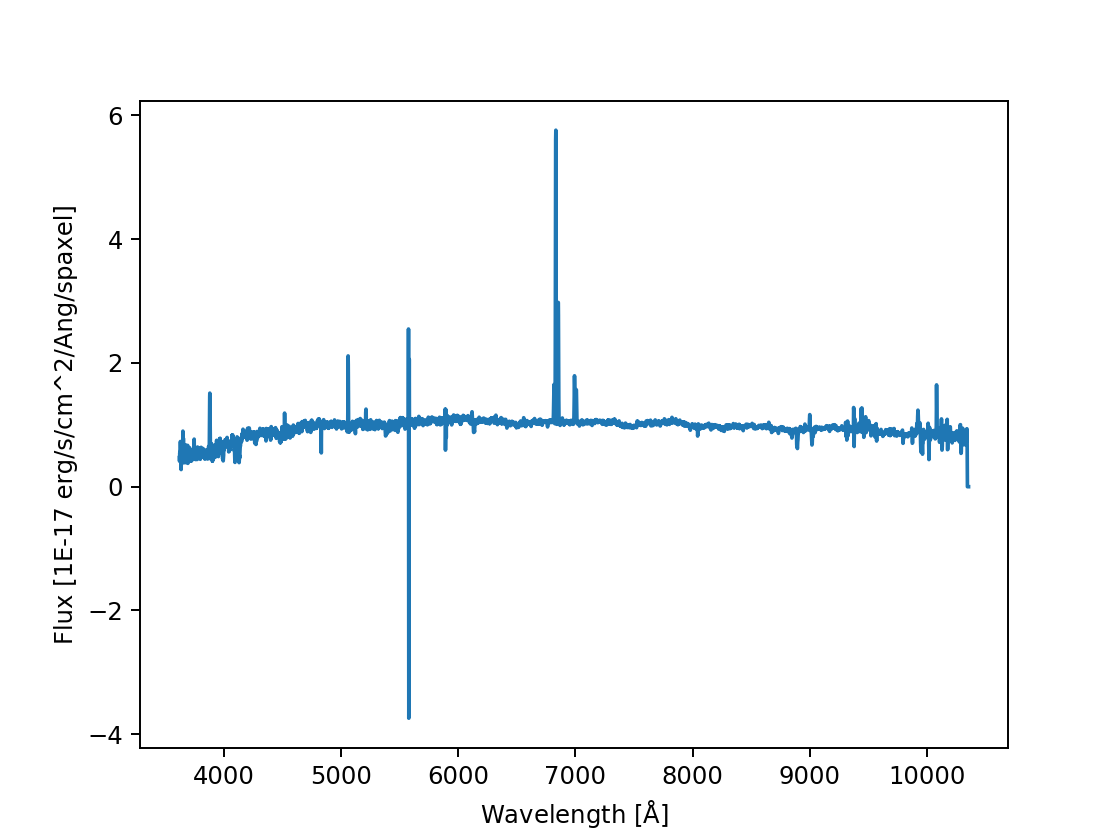

In [19]:
spax.spectrum.plot()

Save plot to Downloads directory:

<IPython.core.display.Javascript object>


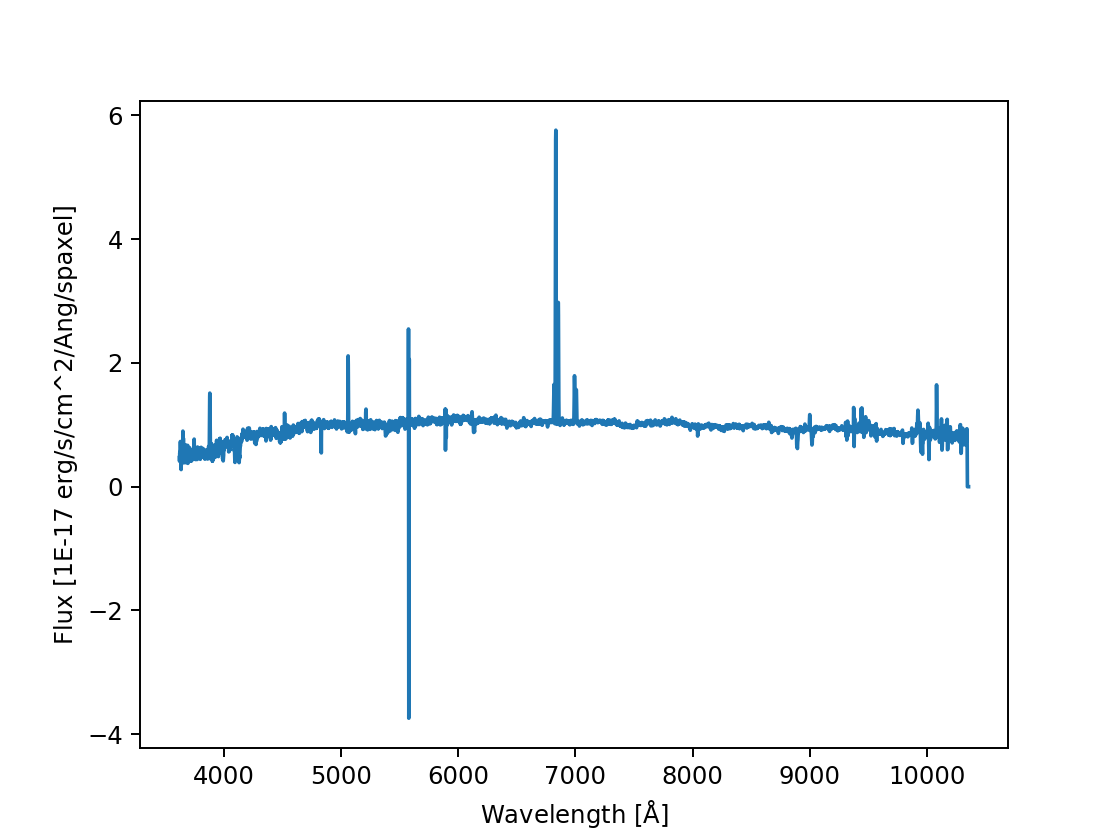

In [20]:
# To save the plot, we need to draw it in the same cell as the save command.
spax.spectrum.plot()

import os
plt.savefig(os.getenv('HOME') + '/Downloads/my-first-spectrum.png')

# NOTE - if you are using the latest version of iPython and Jupyter notebooks, then interactive matplotlib plots 
# should be enabled.  You can save the figure with the save icon in the interactive toolbar.

By default, the spaxel object contains the DAP properties for that spaxel in the unbinned MAPS.

In [21]:
spax.properties

{u'bin_area': <AnalysisProperty (name=bin_area, channels=None, value=0.5 ivar=None, mask=None)>,
 u'bin_farea': <AnalysisProperty (name=bin_farea, channels=None, value=1.0 ivar=None, mask=None)>,
 u'bin_lwellcoo_lum_weighted_elliptical_azimuth': <AnalysisProperty (name=bin_lwellcoo, channels=lum_weighted_elliptical_azimuth, value=113.661 ivar=None, mask=None)>,
 u'bin_lwellcoo_lum_weighted_elliptical_radius': <AnalysisProperty (name=bin_lwellcoo, channels=lum_weighted_elliptical_radius, value=0.0103323 ivar=None, mask=None)>,
 u'bin_lwskycoo_lum_weighted_on_sky_x': <AnalysisProperty (name=bin_lwskycoo, channels=lum_weighted_on_sky_x, value=-0.00925397 ivar=None, mask=None)>,
 u'bin_lwskycoo_lum_weighted_on_sky_y': <AnalysisProperty (name=bin_lwskycoo, channels=lum_weighted_on_sky_y, value=0.00023976 ivar=None, mask=None)>,
 u'bin_mflux': <AnalysisProperty (name=bin_mflux, channels=None, value=1.05485 ivar=2256.17, mask=0)>,
 u'bin_snr': <AnalysisProperty (name=bin_snr, channels=None, v

In [23]:
# Gets the ha_alpha flux and the ivar
ha_flux = spax.properties['emline_gflux_ha_6564']
print(ha_flux.value, ha_flux.ivar, ha_flux.mask)

31.4754199982 47.0896835327 0


# Marvin Maps
Marvin Maps is how you deal with the DAP MAPS FITS files easily.  You can retrieve maps in several ways.  Let's take a took. 

### From a Marvin Maps
Marvin Maps takes the same inputs as cube: filename, plateifu, or mangaid.  It also accepts keywords **bintype** and **template_kin**.  These uniquely define a DAP MAPS file.  By default, Marvin will load a MAPS file of **bintype=SPX** and **template_kin=GAU-MILESHC** for MPL-5.  For MPL-4, the defaults are **bintype=NONE**, and **template_kin=MIUSCAT-THIN**.

In [24]:
# import the maps
from marvin.tools.maps import Maps

# Load a MPL-5 map
mapfile = './manga-8485-1901-MAPS-SPX-GAU-MILESHC.fits.gz'
# Let's get a default map of

maps = Maps(filename=mapfile)
print(maps)

<Marvin Maps (plateifu='8485-1901', mode='local', data_origin='file', bintype=SPX,template_kin=GAU-MILESHC)>


Once you have a maps object, you can access the raw maps file and header and extensions via **maps.header** and **maps.data**.  Alternatively, you can access individual maps using the **getMap** method.  **getMap** works by specifying a parameter and a channel.  The parameter and channels names are equivalent to those found in the MAPS FITS extensions and headers, albeit lowercased. 

In [25]:
# Let's grab the H-alpha flux emission line map
haflux = maps.getMap('emline_gflux', channel='ha_6564')
print(haflux)

<Marvin Map (plateifu='8485-1901', property='emline_gflux', channel='ha_6564')>


<IPython.core.display.Javascript object>


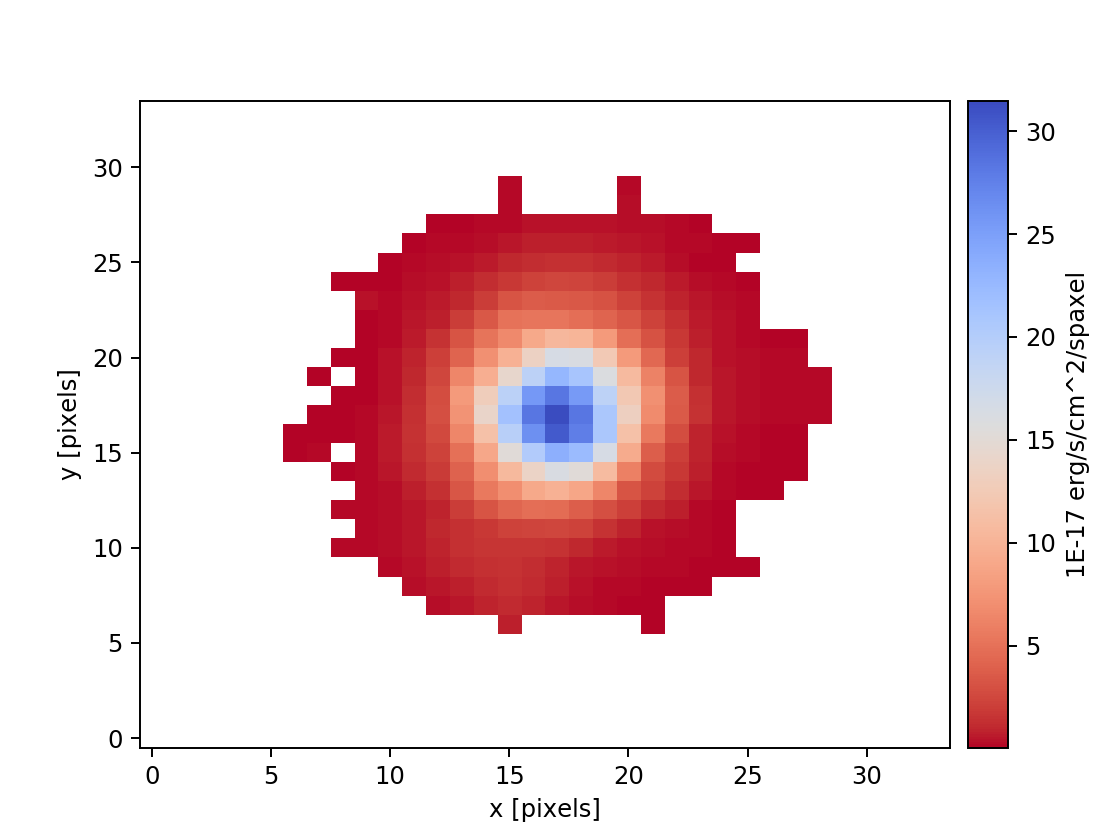

In [26]:
# turn on interactive plotting
%matplotlib notebook

# let's plot it
haflux.plot()

In [27]:
# You can get the flux and ivar arrays
haflux.value, haflux.mask

(array([[  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,  

From the maps object, we can also easily plot the ratio between two maps, e.g. emission-line ratios, using the **getMapRatio** method.  Map ratios are Map objects the same as any other, so you can access their array values or plot them

<Marvin Map (plateifu='8485-1901', property='emline_gflux', channel='nii_6585/ha_6564')>


<IPython.core.display.Javascript object>


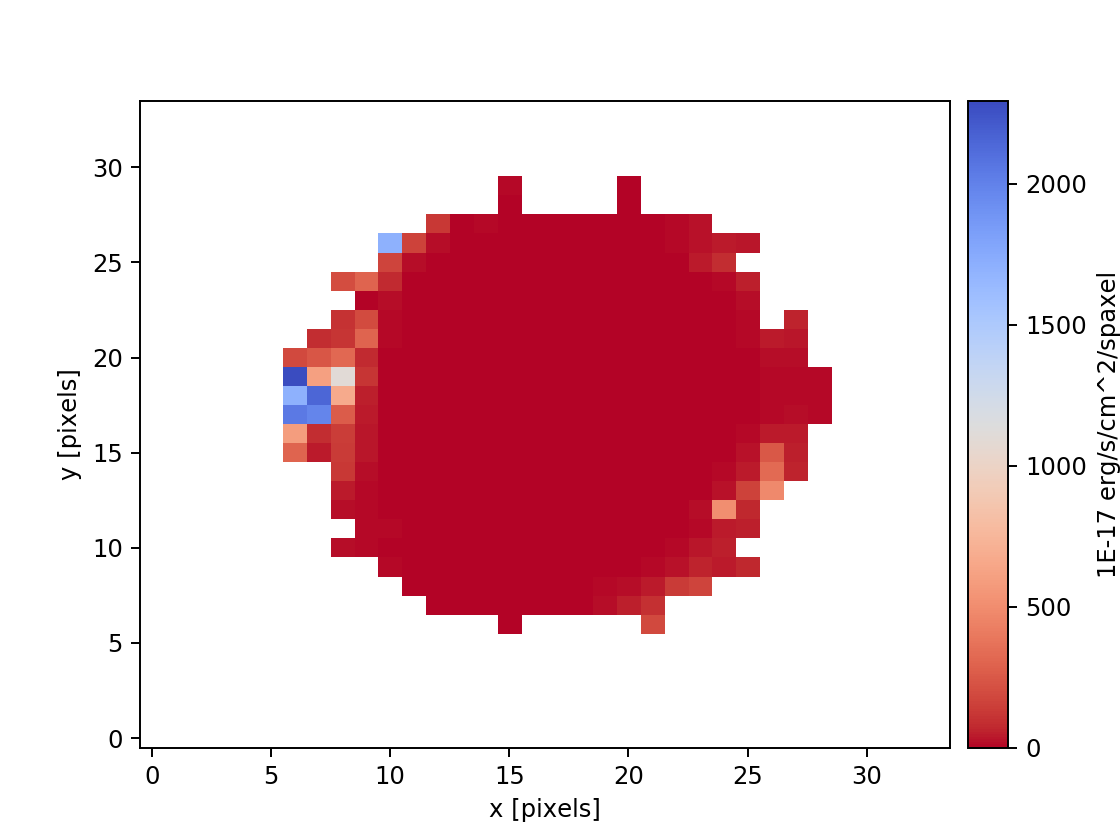

In [30]:
# Let's look at the NII-to-Halpha emission-line ratio map
niiha = maps.getMapRatio('emline_gflux', 'nii_6585', 'ha_6564')
print(niiha)
niiha.plot()

### From a Marvin Cube

Once we have a cube, we can get its maps using the **getMaps** method.  getMaps is just a wrapper to the Marvin Maps Tool.  Once we have the maps, we can do all the same things as before.

In [ ]:
maps = cc.getMaps()
print(maps)

Note that the cube was opened from remote!

# Marvin: now with ModelCubes

MPL-5 introduced ***LOGCUBE*** files, which contain the fitted spectra for each spaxel. LOGCUBES are called `ModelCube` in Marvin, and they are instantiated in the same way as a `Cube` or a `Maps`. Let's see it.

In [31]:
from marvin.tools.modelcube import ModelCube

In [32]:
# For the sake of variety, let's open this ModelCube remotely. For that, simply use the plate-ifu of the target.
model_cube = ModelCube(plateifu='8485-1901', bintype='VOR10')
print(model_cube)

<Marvin ModelCube (plateifu='8485-1901', mode='remote', data_origin='api', bintype=u'VOR10', template_kin=u'GAU-MILESHC')>


**IMPORTANT:** the remote mode rocks!

Let's see a bit more about the `model_cube`. We can get a spaxel, which will include the properties and the cube spectrum.

In [33]:
sp = model_cube.getSpaxel(x=0, y=0)
print(sp.cube)
print(sp.maps)
print(sp.modelcube)
print('Spaxel bintype is:', sp.bintype)

<Marvin Cube (plateifu='8485-1901', mode='remote', data_origin='api')>
<Marvin Maps (plateifu='8485-1901', mode='remote', data_origin='api', bintype=SPX,template_kin=GAU-MILESHC)>
<Marvin ModelCube (plateifu='8485-1901', mode='remote', data_origin='api', bintype=u'SPX', template_kin=u'GAU-MILESHC')>
Spaxel bintype is: SPX


**VERY IMPORTANT:** although the original ModelCube was binned (VOR10) an Spaxel is always unbinned (SPX)!!!

We can get the model spectrum for this spaxel. And plot it.

<IPython.core.display.Javascript object>


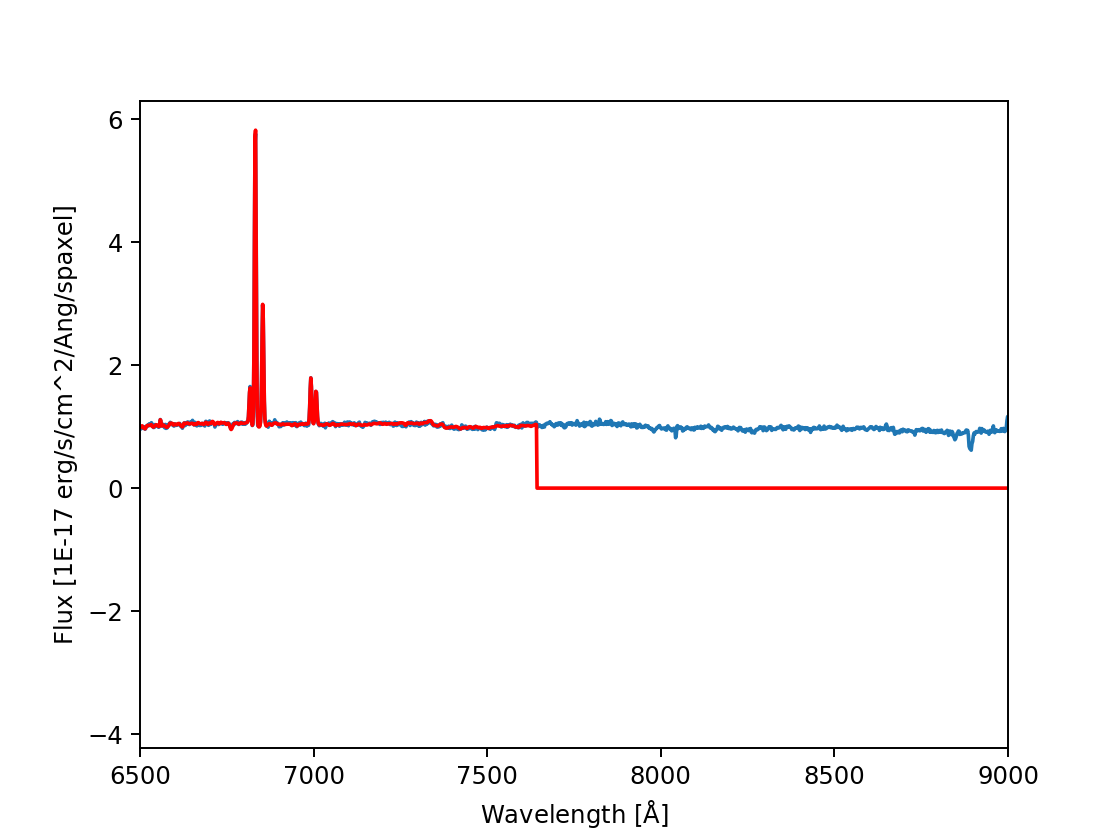

None


In [36]:
cube_spectrum = sp.spectrum
model_spectrum = sp.model
ax = cube_spectrum.plot(xlim=[6500, 9000])
ax.plot(model_spectrum.wavelength, model_spectrum.flux, 'r')
print(model_spectrum.mask)

### Saving the spaxel

Starting in Marvin Beta, you can pickle all the objects and restore them later. Let's assume you want to save that last spaxel. You simply do.

In [37]:
sp.save('such_a_great_spaxel.mpf')

'/Users/albireo/Downloads/marvin_workshop/such_a_great_spaxel.mpf'

And then you can restore by doing

In [38]:
from marvin.tools.spaxel import Spaxel
restored_spaxel = Spaxel.restore('such_a_great_spaxel.mpf')
print(restored_spaxel)

         (0)
<Marvin Spaxel (x=17, y=17; x_cen=0, y_cen=0>


It works for all the objects!

# Downlading data

We have seen that the remote mode allows you to access all the Manga data without worrying where it actually lives. However, once you have located the data you want to use for your science you probably will want to download it for faster/airplane access. That easy to do with Marvin. Let's start by creating a maps from remote.

In [ ]:
from marvin.tools.maps import Maps
remote_maps = Maps(plateifu='8485-1902', mode='remote')
print(remote_maps)

Now let's download it!

In [ ]:
filename = remote_maps.download()
print(filename)

# Binned data

For many science purposes, you will want to use binned data. The DAP produces MAPS and LOGCUBES with different types of binning schemas and kinnematic templates. Refer to the DAP documentation for more information.

Marvin makes very easy to access binned data without needing to know much about the gory details of the data model. We have seen already how to get a binned Maps. Now, let's see how to get a Bin and access its spaxels.

In [39]:
from marvin.tools.bin import Bin
bin_100 = Bin(binid=100, plateifu='8485-1901', bintype='VOR10')
print(bin_100)

<Marvin Bin (binid=100, n_spaxels=2, bintype=VOR10, template_kin=GAU-MILESHC)>


You can access all the properties and model data for the bin as you do with an spaxel.

In [40]:
print(bin_100.properties['emline_gflux_ha_6564'])

<AnalysisProperty (name=emline_gflux, channels=ha_6564, value=4.87482595444 ivar=133.923110962, mask=0)>


<IPython.core.display.Javascript object>


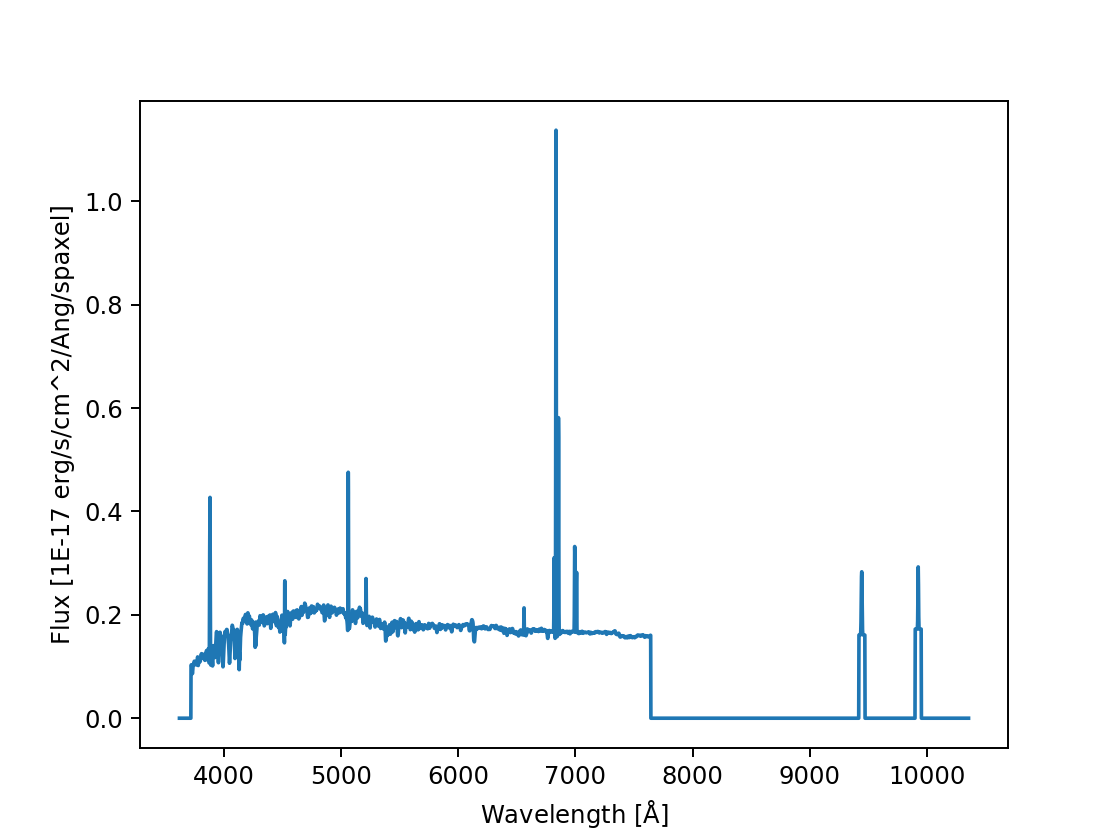

In [41]:
bin_100.model.plot()

But you can also access the **(unbinned)** spaxels for that bin.

In [42]:
print(bin_100.spaxels)

[<Marvin Spaxel (x=18, y=22, loaded=False), <Marvin Spaxel (x=18, y=23, loaded=False)]


You will note that the spaxels are not loaded. That means that the spectra and properties have not yet been retrieved for each spaxel. That is call lazy loading and we do it to improve loading time. You can then load any (or all) of the spaxels doing

In [45]:
bin_100.spaxels[0].load()
print(bin_100.spaxels)
bin_100.spaxels[0].bintype
bin_100.spaxels[0].properties['emline_gflux_ha_6564']

[<Marvin Spaxel (x=18, y=22; x_cen=1, y_cen=5>, <Marvin Spaxel (x=18, y=23, loaded=False)]


<AnalysisProperty (name=emline_gflux, channels=ha_6564, value=4.87482595444 ivar=133.923110962, mask=0)>